In [1]:
import requests
import pandas as pd
import urllib
import json
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
bearer_token = pd.read_csv('Twitter-Keys.txt', sep = "\t", header = 0)

In [3]:
header = {'Authorization' : 'Bearer {}'.format(bearer_token['Bearer_Token'].iloc[0])}

In [4]:
bearer_token.keys()

Index(['Bearer_Token'], dtype='object')

In [17]:
response = requests.request("GET", url, headers = header)

In [18]:
endpoint_url = 'https://api.twitter.com/2/tweets/search/recent'

In [19]:
query = urllib.parse.quote('#SpiderManNoWayHome OR @SpiderManMovie OR #SpiderMan lang : en')

In [20]:
query

'%23SpiderManNoWayHome%20OR%20%40SpiderManMovie%20OR%20%23SpiderMan%20lang%20%3A%20en'

In [21]:
my_api_url = endpoint_url + '?query={}&tweet.fields={}'.format(query, tweet_fields)

In [22]:
my_api_url

'https://api.twitter.com/2/tweets/search/recent?query=%23SpiderManNoWayHome%20OR%20%40SpiderManMovie%20OR%20%23SpiderMan%20lang%20%3A%20en&tweet.fields=public_metrics,created_at,author_id,lang'

In [23]:
tweet_fields = 'public_metrics,created_at,author_id,lang'

In [24]:
expansions = 'author_id'

In [25]:
url = endpoint_url + '?query={}&max_results=100&tweet.fields={}'.format(query, tweet_fields)

In [26]:
url_expansions = endpoint_url + '?query={}&max_results=100&tweet.fields={}&expansions={}&user.fields={}'.format(query, tweet_fields, expansions, 'username')

In [27]:
response_1 = requests.request("GET", url_expansions, headers = header)

In [28]:
response_1_dict = json.loads(response_1.text)

In [29]:
response_1_dict.keys()

dict_keys(['data', 'includes', 'meta'])

In [30]:
my_df = pd.DataFrame(response_1_dict['data'])

In [31]:
my_df

,id,public_metrics,created_at,text,author_id,lang
0,1470616813629231105,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-14T04:49:05.000Z,does it ever just how fast\...,1470449182880243713,en
1,1470616812920442881,"{'retweet_count': 797, 'reply_count': 0, 'like...",2021-12-14T04:49:05.000Z,RT @etnow: Tom Holland's reaction to Zendaya a...,1333438290951868416,en
2,1470616812622594049,"{'retweet_count': 39, 'reply_count': 0, 'like_...",2021-12-14T04:49:05.000Z,RT @SpiderMan3news: Tom Holland &amp; Zendaya ...,1183613664705892352,en
3,1470616812555587592,"{'retweet_count': 1013, 'reply_count': 0, 'lik...",2021-12-14T04:49:05.000Z,RT @dinoj_m: 3 Spideys Confirmed.. Leaked foot...,1445086198373011456,en
4,1470616812119379971,"{'retweet_count': 1356, 'reply_count': 0, 'lik...",2021-12-14T04:49:05.000Z,RT @SashaBanksWWE: #SPIDERMANNOWAYHOME https:/...,786621285363220480,und
...,...,...,...,...,...,...
95,1470616779328212994,"{'retweet_count': 8449, 'reply_count': 0, 'lik...",2021-12-14T04:48:57.000Z,RT @thediegoandaluz: If Tobey Maguire &amp; An...,1218208169828200451,en
96,1470616779307241475,"{'retweet_count': 38, 'reply_count': 0, 'like_...",2021-12-14T04:48:57.000Z,"RT @BRMarvelNews: Alô, Kevin Feige?! Miles Bro...",2537294633,und
97,1470616779252768771,"{'retweet_count': 1356, 'reply_count': 0, 'lik...",2021-12-14T04:48:57.000Z,RT @SashaBanksWWE: #SPIDERMANNOWAYHOME https:/...,36413677,und
98,1470616779248619520,"{'retweet_count': 95, 'reply_count': 0, 'like_...",2021-12-14T04:48:57.000Z,RT @SpiderManBRA: UM DEUS CHAMADO FAÍSCA!\n\nJ...,1215041643595911169,es


In [32]:
response_1_dict['meta']

{'newest_id': '1470616813629231105',
 'oldest_id': '1470616779240128521',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpe15cereo9zfhbyh7o4pnohf024xp'}

In [33]:
user_info = pd.DataFrame(response_1_dict['includes']['users'])

In [34]:
my_df['name'] = user_info['name']
my_df['username'] = user_info['username']
my_df

,id,public_metrics,created_at,text,author_id,lang,name,username
0,1470616813629231105,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-14T04:49:05.000Z,does it ever just how fast\...,1470449182880243713,en,no way home,ifsdecker
1,1470616812920442881,"{'retweet_count': 797, 'reply_count': 0, 'like...",2021-12-14T04:49:05.000Z,RT @etnow: Tom Holland's reaction to Zendaya a...,1333438290951868416,en,beluuu 🖤🍒,itsgonbeluuu_
2,1470616812622594049,"{'retweet_count': 39, 'reply_count': 0, 'like_...",2021-12-14T04:49:05.000Z,RT @SpiderMan3news: Tom Holland &amp; Zendaya ...,1183613664705892352,en,Lil Ma'am 🔥🍫😺😹😻😽💋👅,daddybitchmommy
3,1470616812555587592,"{'retweet_count': 1013, 'reply_count': 0, 'lik...",2021-12-14T04:49:05.000Z,RT @dinoj_m: 3 Spideys Confirmed.. Leaked foot...,1445086198373011456,en,Alexander Arguüelles,FredyArguelles_
4,1470616812119379971,"{'retweet_count': 1356, 'reply_count': 0, 'lik...",2021-12-14T04:49:05.000Z,RT @SashaBanksWWE: #SPIDERMANNOWAYHOME https:/...,786621285363220480,und,RockyDrago66,RDrago66
...,...,...,...,...,...,...,...,...
95,1470616779328212994,"{'retweet_count': 8449, 'reply_count': 0, 'lik...",2021-12-14T04:48:57.000Z,RT @thediegoandaluz: If Tobey Maguire &amp; An...,1218208169828200451,en,Drew Jemison,TenTen0809
96,1470616779307241475,"{'retweet_count': 38, 'reply_count': 0, 'like_...",2021-12-14T04:48:57.000Z,"RT @BRMarvelNews: Alô, Kevin Feige?! Miles Bro...",2537294633,und,king of shadows,Zish22
97,1470616779252768771,"{'retweet_count': 1356, 'reply_count': 0, 'lik...",2021-12-14T04:48:57.000Z,RT @SashaBanksWWE: #SPIDERMANNOWAYHOME https:/...,36413677,und,NaN,NaN
98,1470616779248619520,"{'retweet_count': 95, 'reply_count': 0, 'like_...",2021-12-14T04:48:57.000Z,RT @SpiderManBRA: UM DEUS CHAMADO FAÍSCA!\n\nJ...,1215041643595911169,es,NaN,NaN


In [51]:
my_df.to_csv(r'/Users/travis/DEMT2021/FinalProject.csv')

In [52]:
url_2 = url_expansions + '&next_token={}'.format(response_1_dict['meta']['next_token'])

In [53]:
response_2 = requests.request("GET", url_2, headers = header)

In [54]:
response_2_dict = json.loads(response_2.text)

In [55]:
user_info2 = pd.DataFrame(response_2_dict['includes']['users'])

In [56]:
my_df2 = pd.DataFrame(response_2_dict['data'])

In [57]:
my_df2['name'] = user_info2['name']
my_df2['username'] = user_info2['username']
my_df2

,lang,public_metrics,created_at,text,id,author_id,name,username
0,en,"{'retweet_count': 40, 'reply_count': 0, 'like_...",2021-12-14T04:48:57.000Z,RT @mcucomfort: HIM and only HIM!!!!!\n\n#Spid...,1470616778921459716,1256603557748490240,vicky` susan's wife 🐇,91GOLD3NLOU
1,en,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2021-12-14T04:48:57.000Z,Just saw No Way Home. Can confirm Peter Porker...,1470616778543751170,2988081116,J,jesseneedssleep
2,nl,"{'retweet_count': 1698, 'reply_count': 0, 'lik...",2021-12-14T04:48:57.000Z,RT @Marvel: 🎃 Willem Dafoe is here! #SpiderMan...,1470616778422173700,723079729985675264,Fordprd,Fordprd
3,en,"{'retweet_count': 339, 'reply_count': 0, 'like...",2021-12-14T04:48:57.000Z,RT @AliPlumb: So... what do you think the name...,1470616778330025984,1333640984803028995,free range coochie,notshebJAMmin
4,en,"{'retweet_count': 336, 'reply_count': 0, 'like...",2021-12-14T04:48:57.000Z,RT @WWE: Did the #SpiderVerse just become the ...,1470616777688326147,1338881667193245697,sohailk,sohailkalo
...,...,...,...,...,...,...,...,...
95,en,"{'retweet_count': 1924, 'reply_count': 0, 'lik...",2021-12-14T04:48:48.000Z,RT @Marvel: ✨@Zendaya is lighting up the red c...,1470616739289329670,992639844848316416,mona lisa,lalisaponytail
96,en,"{'retweet_count': 116, 'reply_count': 0, 'like...",2021-12-14T04:48:48.000Z,RT @AaronBaileyArt: .@ZackSnyder has arrived a...,1470616739192848384,1356546940775788544,J A S M I N E 🦋,majesticmerder
97,en,"{'retweet_count': 269, 'reply_count': 0, 'like...",2021-12-14T04:48:48.000Z,RT @therealsupes: Remember people when said th...,1470616739134255107,2576282230,ADRIAN,AdrianMusic_
98,en,"{'retweet_count': 14073, 'reply_count': 0, 'li...",2021-12-14T04:48:47.000Z,RT @SpiderManMovie: NO SPOILERS. 🚫 Don’t be th...,1470616738718904324,1373717994203795457,NaN,NaN


In [58]:
my_df2.to_csv(r'/Users/travis/DEMT2021/FinalProject2.csv')

In [59]:
url_3 = url_expansions + '&next_token={}'.format(response_2_dict['meta']['next_token'])

In [60]:
response_3 = requests.request("GET", url_3, headers = header)

In [61]:
response_3_dict = json.loads(response_3.text)

In [62]:
user_info3 = pd.DataFrame(response_3_dict['includes']['users'])

In [63]:
my_df3 = pd.DataFrame(response_3_dict['data'])

In [68]:
my_df3['name'] = user_info3['name']
my_df3['username'] = user_info3['username']
my_df3

,created_at,public_metrics,text,author_id,id,lang,name,username
0,2021-12-14T04:48:47.000Z,"{'retweet_count': 9, 'reply_count': 0, 'like_c...",RT @houseofbaIloon: LAW ROACH. I LOVE YOU. #Sp...,751702189198831621,1470616737926172672,en,2017 ME IS WINNING,jmosbody
1,2021-12-14T04:48:47.000Z,"{'retweet_count': 34, 'reply_count': 0, 'like_...",RT @BingeWatchThis_: Find someone who looks at...,1639252242,1470616737913708549,en,Mario,MarioCosajay1
2,2021-12-14T04:48:47.000Z,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",#premiere @spidermanmovie @zendaya 🌟🌟🌟 en Mexi...,132727534,1470616737867571207,es,Oscar_Urbina18,Oscar_Urbina18
3,2021-12-14T04:48:47.000Z,"{'retweet_count': 5, 'reply_count': 0, 'like_c...",RT @EnriqeMorales: Desinstalando todo para evi...,984969412334800897,1470616737133563906,es,nico,pjmkilldancer
4,2021-12-14T04:48:47.000Z,"{'retweet_count': 3057, 'reply_count': 0, 'lik...",RT @SpiderManMovie: @JaredLeto Ladies and gent...,3098111160,1470616736382984192,en,밥랑자,555_BaB
...,...,...,...,...,...,...,...,...
95,2021-12-14T04:48:40.000Z,"{'retweet_count': 1372, 'reply_count': 0, 'lik...",RT @SashaBanksWWE: #SPIDERMANNOWAYHOME https:/...,4767070952,1470616706590511106,und,JonnyLeTran7,JonnyLeTran7
96,2021-12-14T04:48:40.000Z,"{'retweet_count': 231, 'reply_count': 0, 'like...",RT @BrandonDavisBD: Simu Liu’s reaction to the...,700563849708118017,1470616706364157953,en,vicky` susan's wife 🐇,91GOLD3NLOU
97,2021-12-14T04:48:40.000Z,"{'retweet_count': 1280, 'reply_count': 0, 'lik...",RT @SpiderManMovie: Looking good in every dime...,388770755,1470616705798131712,en,NaN,NaN
98,2021-12-14T04:48:39.000Z,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",RT @JonnyLeTran5: Blessing your timeline with ...,1242314726530400257,1470616704833130496,en,NaN,NaN


In [69]:
my_df3.to_csv(r'/Users/travis/DEMT2021/FinalProject3.csv')

TypeError: '<=' not supported between instances of 'dict' and 'dict'

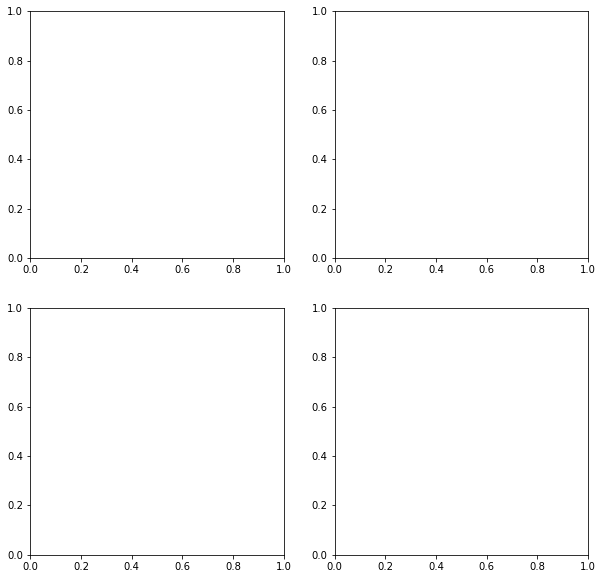

In [70]:
fig0, ax0 = plt.subplots(2, 2, figsize = (10,10))
ax0[0,0].hist(my_df['public_metrics'], bins = 5)
ax0[0,0].title.set_text("bins = 5")
ax0[0,1].hist(my_df2['public_metrics'], bins = 10)
ax0[0,1].title.set_text("bins = 10")
ax0[1,0].hist(my_df3['public_metrics'], bins = 15)
ax0[1,0].title.set_text("bins = 15")

plt.show()

I wanted to use subplots to view the public metric data for the tweets i pulled from twitter. Without being able to get the graphs to work the data can't be viewed, however by looking at the public metrics from each tweet we can see that tweets were varying from either no interactions, to having thousands of retweets or likes. so either some posts catch on and others don't. The tweets with a lot of interactions usually interacted with a famous person. For example tweets that interacted with sasha banks a WWE  usually had a return on interactions in the public metric category for the tweets that were pulled.